    INFO : 2020-05-20 07:19:46,244 : start: set_dataset
    INFO : 2020-05-20 07:19:46,245 : start: add_column_trend
    INFO : 2020-05-20 07:19:46,245 : start: add_column_extreme_60_later
    INFO : 2020-05-20 07:19:46,245 : start: add_column_next_extreme
    INFO : 2020-05-20 07:19:46,246 : start: add_columns_close_ratio
    INFO : 2020-05-20 07:19:46,247 : start: add_columns_time
    INFO : 2020-05-20 07:19:46,248 : start: convert_hlc_to_ratio
    INFO : 2020-05-20 07:19:46,249 : start: remove_missing_rows
    INFO : 2020-05-20 07:20:42,014 : end: set_dataset


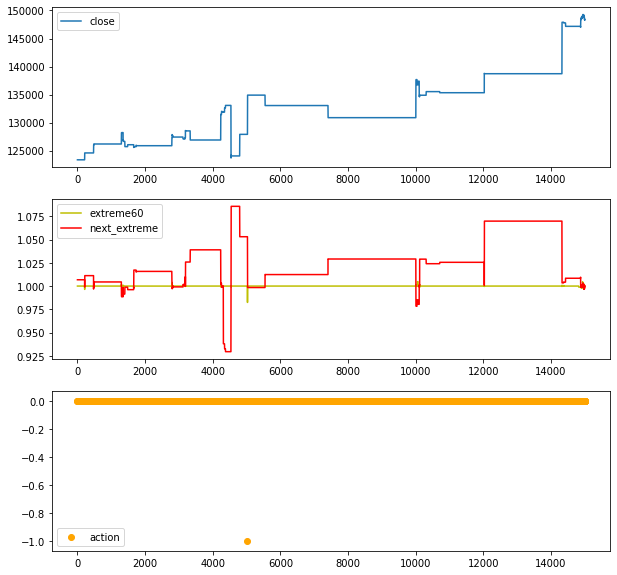

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import dataset
%matplotlib inline

def plot(x, y_close, y_result, y_next_ratio, y_action):
    _, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    ax1.plot(list(range(len(x))), y_close, label='close')
    ax1.legend()
    ax2.plot(list(range(len(x))), y_result, label='extreme60')
    ax2.plot(list(range(len(x))), y_next_ratio, label='next_extreme')
    ax2.legend()
    ax3.scatter(list(range(len(x))), y_action, label='action')
    ax3.legend()
    plt.show()

def main():
    csv = pd.read_csv("datasets/v0.0.11-test.csv")
    b = dataset.BitcoinDataset("v0.0.11-test")
    b.set_dataset(csv)
    
    x = b.data[:15000]
    y_close = list(x["close"])
    y_result = list(x["extreme60"])
    y_next_ratio = list(x["next_extreme"])
    y_action = [(1 if i > 1 else -1) if i > 1.005 or i < 0.995 else 0 for i in y_result]
    
    plot(x, y_close, y_result, y_next_ratio, y_action)


if __name__ == "__main__":
    main()

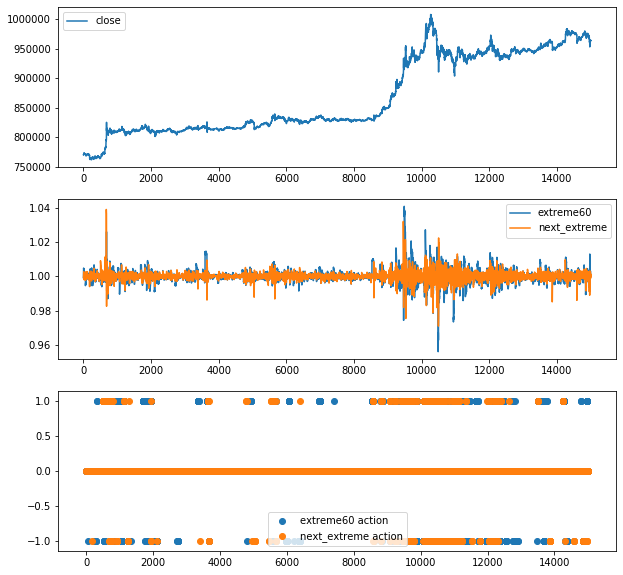

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import dataset
%matplotlib inline

def plot(data):
    x = data[-15000:]
    y_close = list(x["close"])
    y_result = list(x["extreme60"])
    y_result2 = list(x["next_extreme"])
    y_action = [(1 if i > 1 else -1) if i > 1.005 or i < 0.995 else 0 for i in y_result]
    y_action2 = [(1 if i > 1 else -1) if i > 1.005 or i < 0.995 else 0 for i in y_result2]

    _, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    ax1.plot(list(range(len(x))), y_close, label='close')
    ax1.legend()
    ax2.plot(list(range(len(x))), y_result, label='extreme60')
    ax2.plot(list(range(len(x))), y_result2, label='next_extreme')
    ax2.legend()
    ax3.scatter(list(range(len(x))), y_action, label='extreme60 action')
    ax3.scatter(list(range(len(x))), y_action2, label='next_extreme action')
    ax3.legend()
    plt.show()

csv = pd.read_csv("datasets/v0.0.11-test.csv")
# csv.drop(columns=["extreme60"], inplace=True)
#b = dataset.BitcoinDataset("v0.0.10-2")
#b.set_dataset(csv)
plot(csv)